In [1]:
pip install openstudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib notebook

import os
import shutil
import sys
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pour supprimer le idf du code si besoin
if os.path.exists('test.idf'):
    os.remove('test.idf')
    
if os.path.exists('out/'):
    shutil.rmtree('out/')


In [3]:
import openstudio

In [4]:
m = openstudio.model.exampleModel() #création d'un modèle openstudio par défaut

In [5]:
[x.remove() for x in m.getOutputVariables()] #Nettoyage des variables de sorties configurées dans le model openstudio (interêt encore à déterminer)

[(<openstudio.openstudioutilitiesidf.IdfObject; proxy of <Swig Object of type 'openstudio::IdfObject *' at 0x0000024CED3CE6F0> >,),
 (<openstudio.openstudioutilitiesidf.IdfObject; proxy of <Swig Object of type 'openstudio::IdfObject *' at 0x0000024CED3CE720> >,),
 (<openstudio.openstudioutilitiesidf.IdfObject; proxy of <Swig Object of type 'openstudio::IdfObject *' at 0x0000024CED3CE7E0> >,),
 (<openstudio.openstudioutilitiesidf.IdfObject; proxy of <Swig Object of type 'openstudio::IdfObject *' at 0x0000024CED3CE870> >,)]

In [6]:
o = openstudio.model.OutputVariable("Site Outdoor Air Drybulb Temperature", m) #Ajoute "X" comme variable d'output du modèle
o.setKeyValue("Environment") #Configuration de la Key_Value de cette output (intérêt à déterminer)
o.setReportingFrequency("Timestep") #Configuration de la fréquence des points de calcul (intérêt à déterminer)

True

In [7]:
for var in ["Zone Mean Air Temperature",
            "Zone Thermostat Heating Setpoint Temperature",
            "Zone Thermostat Cooling Setpoint Temperature"]:
    o = openstudio.model.OutputVariable(var, m)
    #o.setKeyValue(openstudio.model.getThermalZones(m)[0].nameString())
    o.setReportingFrequency("Timestep")

In [8]:
[print(x) for x in m.getOutputVariables()] #les "None" dans le print indique qu'il n'y a pas de valeurs

OS:Output:Variable,
  {4efa3248-56b3-4efa-abe1-f1249c500b51}, !- Handle
  Output Variable 1,                      !- Name
  Environment,                            !- Key Value
  Site Outdoor Air Drybulb Temperature,   !- Variable Name
  Timestep;                               !- Reporting Frequency


OS:Output:Variable,
  {356cceb4-ac6b-4205-b7ce-9ec610e82365}, !- Handle
  Output Variable 3,                      !- Name
  ,                                       !- Key Value
  Zone Thermostat Heating Setpoint Temperature, !- Variable Name
  Timestep;                               !- Reporting Frequency


OS:Output:Variable,
  {9be5dfa2-9a17-4cf1-96b5-22c8eee31a1d}, !- Handle
  Output Variable 2,                      !- Name
  ,                                       !- Key Value
  Zone Mean Air Temperature,              !- Variable Name
  Timestep;                               !- Reporting Frequency


OS:Output:Variable,
  {3522782b-7670-485c-9b21-3e2e6d6ce1bd}, !- Handle
  Output Vari

[None, None, None, None]

In [9]:
timestep = m.getTimestep() #Récupérer le pas de temps du modèle
print(timestep)

OS:Timestep,
  {150a0e24-58cb-4ff3-8188-9c95c1bd024f}, !- Handle
  6;                                      !- Number of Timesteps per Hour




In [10]:
timestep.setNumberOfTimestepsPerHour(4) #Configuration du pas de temps du modèle. 
print(timestep)

OS:Timestep,
  {150a0e24-58cb-4ff3-8188-9c95c1bd024f}, !- Handle
  4;                                      !- Number of Timesteps per Hour




In [11]:
z = m.getThermalZones()[0] #Extraction des objets "ThermalZones" du modèle équivalent à l'onglet thermal zone du logiciel openstudio
t = z.thermostatSetpointDualSetpoint().get() #Extraction des valeurs de consignes 
heating_sch = t.heatingSetpointTemperatureSchedule().get() #Extraction du scénario de chauffage
o = heating_sch.to_ScheduleRuleset() #Ce qui suit permet de paramétrer les règles du scénario (le détail est encore à appronfondir)
if o.is_initialized():
    heating_sch = o.get()
    print(heating_sch.briefDescription())
else:
    print(heating_sch.briefDescription())
#heating_sch = openstudio.model.toScheduleRuleset(heating_sch).get()

Object of type 'OS:Schedule:Ruleset' and named 'Medium Office Heating Setpoint Schedule'


In [12]:
print(heating_sch.defaultDaySchedule()) 

OS:Schedule:Day,
  {1dd2e5bf-0a54-420a-a361-2221dc39c617}, !- Handle
  Medium Office Heating Setpoint All Other Days Schedule, !- Name
  {dd95ab20-8841-46ac-8c6c-01968c05f227}, !- Schedule Type Limits Name
  ,                                       !- Interpolate to Timestep
  24,                                     !- Hour 1
  0,                                      !- Minute 1
  15.6;                                   !- Value Until Time 1




In [13]:
[print(x) for x in heating_sch.scheduleRules()] #Afficher les différentes règles du scénario  

OS:Schedule:Rule,
  {908a71a5-d38d-41b3-91df-e6934dd6a509}, !- Handle
  Medium Office Heating Setpoint Schedule Saturday Rule, !- Name
  {276221e0-8628-4a2c-9495-b835ba15fc66}, !- Schedule Ruleset Name
  0,                                      !- Rule Order
  {616eee29-5941-4b68-96ff-ca75eefe26e9}, !- Day Schedule Name
  ,                                       !- Apply Sunday
  ,                                       !- Apply Monday
  ,                                       !- Apply Tuesday
  ,                                       !- Apply Wednesday
  ,                                       !- Apply Thursday
  ,                                       !- Apply Friday
  Yes;                                    !- Apply Saturday


OS:Schedule:Rule,
  {8957fdaf-9938-4bdc-b63c-4cfcb53f3a42}, !- Handle
  Medium Office Heating Setpoint Schedule Weekdays Rule, !- Name
  {276221e0-8628-4a2c-9495-b835ba15fc66}, !- Schedule Ruleset Name
  1,                                      !- Rule Order
  {b8

[None, None]

In [14]:
r = m.getRunPeriod() #Obtenir les caractéristiques de la périodes de simulation
print(r)

OS:RunPeriod,
  {c88dcc0f-5d84-443d-b770-9c8fff04b1ed}, !- Handle
  Run Period 1,                           !- Name
  1,                                      !- Begin Month
  1,                                      !- Begin Day of Month
  12,                                     !- End Month
  31,                                     !- End Day of Month
  No,                                     !- Use Weather File Holidays and Special Days
  No,                                     !- Use Weather File Daylight Saving Period
  No,                                     !- Apply Weekend Holiday Rule
  Yes,                                    !- Use Weather File Rain Indicators
  Yes,                                    !- Use Weather File Snow Indicators
  1;                                      !- Number of Times Runperiod to be Repeated




In [15]:
r.setEndMonth(1) #Configurer le nombre de mois
r.setEndDayOfMonth(31) #Configurer le nombre de jour par mois

True

In [16]:
print(r)

OS:RunPeriod,
  {c88dcc0f-5d84-443d-b770-9c8fff04b1ed}, !- Handle
  Run Period 1,                           !- Name
  1,                                      !- Begin Month
  1,                                      !- Begin Day of Month
  1,                                      !- End Month
  31,                                     !- End Day of Month
  No,                                     !- Use Weather File Holidays and Special Days
  No,                                     !- Use Weather File Daylight Saving Period
  No,                                     !- Apply Weekend Holiday Rule
  Yes,                                    !- Use Weather File Rain Indicators
  Yes,                                    !- Use Weather File Snow Indicators
  1;                                      !- Number of Times Runperiod to be Repeated




In [17]:
ft = openstudio.energyplus.ForwardTranslator() #Ce qui suit permet de convertir le modèle OpenStudio en  .idf
w = ft.translateModel(m)
w.save(openstudio.path('test.idf'), True)

True

In [18]:
# Importation du module pyenergyplus depuis le dossier d'installatiuon de EnergyPlus
sys.path.insert(0, '/EnergyPlusV9-6-0/')
from pyenergyplus.api import EnergyPlusAPI

In [19]:
import pyenergyplus
#pyenergyplus.api.EnergyPlusAPI.api_version()

<IPython.core.display.Javascript object>


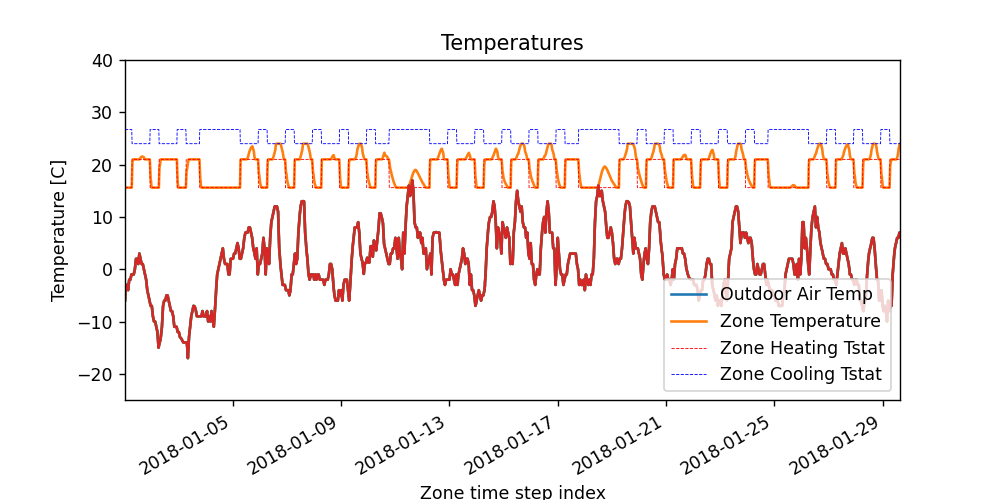

Thermal Zone 1
Wall time: 7.21 s


In [20]:
%%time
#Création des variables du plot
x = []
y_outdoor = [] #Températures à l'extérieur
y_zone = [] #Températures à l'intérieur de la zone thermique considérée
y_htg = [] #Heating 
y_clg = [] #Cooling

years = []
months = []
days = []
hours = []
minutes = []
current_times = []
actual_date_times = []
actual_times = []

#Affichage
fig, ax = plt.subplots(figsize=(8, 4), num='Real time plot')
h1, = ax.plot(x, y_outdoor, label="Outdoor Air Temp")
h2, = ax.plot(x, y_zone, label="Zone Temperature")
h_htg, = ax.plot(x, y_htg, label='Zone Heating Tstat', linestyle='--', color='r', linewidth=0.5)
h_clg, = ax.plot(x, y_clg, label='Zone Cooling Tstat', linestyle='--', color='blue', linewidth=0.5)

ax.set_title('Temperatures')
ax.set_xlabel('Zone time step index')
ax.set_ylabel('Temperature [C]')
ax.legend(loc='lower right')
ax.set_ylim(-25, 40)
fig.autofmt_xdate()

# plt.show(False)
#plt.draw()
    

filename_to_run = 'test.idf'
zone_name = openstudio.model.getThermalZones(m)[0].nameString() #Pour extraire le nom d'une des zones thermiques
print(zone_name)
got_handles = False
oa_temp_handle = -1
zone_temp_handle = -1
zone_htg_tstat_handle = -1
zone_clg_tstat_handle = -1
count = 0
plot_update_interval = 250  # time steps

def update_line(): #Pour modifier en temps réel le graphe
    
    
    #hl.set_data(x, y_outdoor)
    #h2.set_data(x, y_zone)
    
    h1.set_xdata(x)
    h1.set_ydata(y_outdoor)
    h2.set_xdata(x)
    h2.set_ydata(y_zone)
    h_htg.set_xdata(x)
    h_htg.set_ydata(y_htg)
    h_clg.set_xdata(x)
    h_clg.set_ydata(y_clg)
    
    ax.set_xlim(x[0], x[-1])
    #ax.set_ylim(min(y_outdoor + y_zone), max(y_outdoor + y_zone))
    #ax.autoscale_view()
    fig.canvas.draw()
    


def callback_function(state_argument): #Fonciton permettant d'extraire les valeurs de la simulation en temps réel (à appronfondir)
    global count, got_handles, oa_temp_handle, zone_temp_handle, zone_htg_tstat_handle, zone_clg_tstat_handle
    if not got_handles:
        if not api.exchange.api_data_fully_ready(state_argument):
            return
        oa_temp_handle = api.exchange.get_variable_handle(state_argument, u"SITE OUTDOOR AIR DRYBULB TEMPERATURE", u"ENVIRONMENT")
        zone_temp_handle = api.exchange.get_variable_handle(state_argument, "Zone Mean Air Temperature", zone_name)
        zone_htg_tstat_handle = api.exchange.get_variable_handle(state_argument, "Zone Thermostat Heating Setpoint Temperature", zone_name)
        zone_clg_tstat_handle = api.exchange.get_variable_handle(state_argument, "Zone Thermostat Cooling Setpoint Temperature", zone_name)

        if -1 in [oa_temp_handle, zone_temp_handle, zone_htg_tstat_handle, zone_clg_tstat_handle]:
            
            print("***Invalid handles, check spelling and sensor/actuator availability")
            sys.exit(1)
        got_handles = True
    if api.exchange.warmup_flag(state_argument):
        return
    count += 1
    #x.append(count)
    oa_temp = api.exchange.get_variable_value(state_argument, oa_temp_handle)
    y_outdoor.append(oa_temp)
    zone_temp = api.exchange.get_variable_value(state_argument, zone_temp_handle)
    y_zone.append(zone_temp)
    
    zone_htg_tstat = api.exchange.get_variable_value(state_argument, zone_htg_tstat_handle)
    y_htg.append(zone_htg_tstat)
    
    zone_clg_tstat = api.exchange.get_variable_value(state_argument, zone_clg_tstat_handle)
    y_clg.append(zone_clg_tstat)
    
    
    year = api.exchange.year(state)
    month = api.exchange.month(state)
    day = api.exchange.day_of_month(state)
    hour = api.exchange.hour(state)
    minute = api.exchange.minutes(state)
    current_time = api.exchange.current_time(state)
    actual_date_time = api.exchange.actual_date_time(state)
    actual_time = api.exchange.actual_time(state)
                    
    year = 2018
    years.append(year)
    months.append(month)
    days.append(day)
    hours.append(hour)
    minutes.append(minute)
    
    current_times.append(current_time)
    actual_date_times.append(actual_date_time)
    actual_times.append(actual_time)
    
    timedelta = datetime.timedelta()
    if hour >= 24.0:
        hour = 23.0
        timedelta += datetime.timedelta(hours=1)
    if minute >= 60.0:
        minute = 59
        timedelta += datetime.timedelta(minutes=1)
    
    dt = datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute)
    dt += timedelta
    x.append(dt)
    
    if count % plot_update_interval == 0:
        update_line()

api = EnergyPlusAPI() #Création d'un objet EnergyPLusAPI qui englobe l'ensemble des foncitonnalités de pyenergyplus
state = api.state_manager.new_state()

api.runtime.callback_begin_zone_timestep_after_init_heat_balance(state, callback_function) #Lancement de la focniton callback
api.runtime.run_energyplus(state,
    [
        '-w', '/EnergyPlusV9-6-0/WeatherData/USA_CO_Golden-NREL.724666_TMY3.epw',
        '-d', 'out',
        filename_to_run
    ]
) #Lancement de la simulation avec le fichier météo en entrée

api.state_manager.reset_state(state) #Reset l'obejt state pour faire de nouvelles simulation

<IPython.core.display.Javascript object>


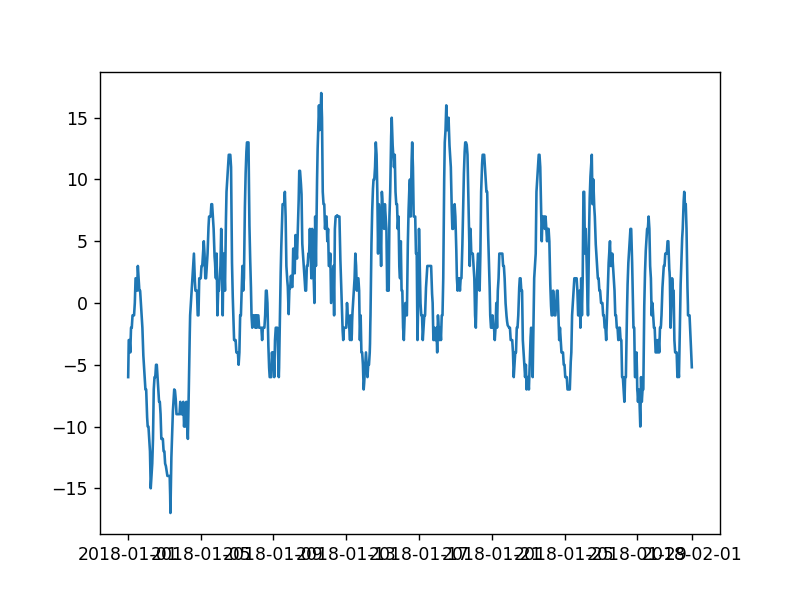

In [23]:
f=plt.figure()
plt.plot(x,y_outdoor)
plt.show()